## Assignment 5
#### William Liang jl5825

In [17]:
import numpy as np
np.set_printoptions(suppress=True)
import time

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
G = 6.67408e-11

## Problem 1

In [97]:
class Body:
    def __init__(self, mass, pos):
        self.mass = mass
        self.pos = pos     # [x,y] for position coordinate
        self.v = None
        self.v_half = None
        self.acc = np.array([0,0])

    def update_acc(self, other):
            if self == other:
                self.acc = np.array([0,0])
            else:
                self.acc = G * other.mass * (np.subtract(other.pos, self.pos)/(np.linalg.norm(np.subtract(other.pos,self.pos)))**3)

    def get_acc(self, other):
        if self == other:
            return  np.array([0,0])
        else:
            return G * other.mass * (np.subtract(other.pos, self.pos)/(np.linalg.norm(np.subtract(other.pos,self.pos)))**3)

    def get_ke(self):
        return 0.5 * self.mass * (np.linalg.norm(self.v))**2

    def get_u(self, other):
        if self == other:
            return 0.0
        else:
            return -G * self.mass * other.mass / (np.linalg.norm(np.subtract(other.pos,self.pos)))

In [98]:
Sun = Body(1.98e30, [0,0])
Earth = Body(5.97e24, [148.5e9,0])

Sun.v = np.array([0,0])
Earth.v = np.sqrt((G*Sun.mass)/148.5e9)*np.array([0,1])


In [99]:
N=2
t=0
endTime = 1.578e+8
dt = 1000.0
steps = int(np.ceil(endTime/dt))

In [100]:
Earth.update_acc(Sun)
Sun.update_acc(Earth)

In [101]:
Earth.v_half = ((Earth.acc*dt)/2)+Earth.v
Sun.v_half = ((Sun.acc*dt)/2)+Sun.v

In [102]:
plt.style.use('dark_background')

In [103]:
R= []
T= []

x = []
y=[]

S_x=[]
S_y=[]

TE = []

for i in range (steps):
    T.append(t)
    R.append(np.linalg.norm(np.subtract(Earth.pos, Sun.pos)))


    x.append(Earth.pos[0])
    y.append(Earth.pos[1])

    S_x.append(Sun.pos[0])
    S_y.append(Sun.pos[1])

    Sun.pos = Sun.pos + dt * Sun.v_half
    Earth.pos = Earth.pos + dt * Earth.v_half

    TE.append(-G*Sun.mass*Earth.mass/2*np.linalg.norm(np.subtract(Earth.pos, Sun.pos)))

    Sun.update_acc(Earth)
    Earth.update_acc(Sun)

    Sun.v= Sun.v_half + dt * Sun.acc/2
    Earth.v = Earth.v_half + dt * Earth.acc/2

    Sun.v_half = Sun.v_half + dt * Sun.acc
    Earth.v_half = Earth.v_half + dt * Earth.acc

    t += dt

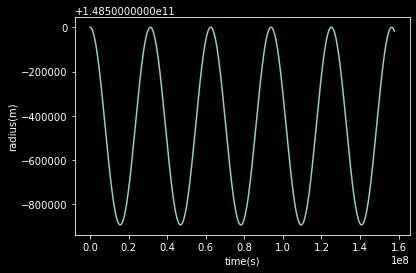

In [104]:
plt.xlabel("time(s)")
plt.ylabel("radius(m)")
plt.plot(T,R)

Text(0.5, 1.0, 'Earth and Sun Orbit')

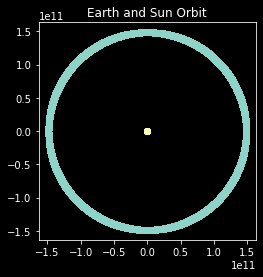

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
plt.scatter(S_x,S_y)
ax.set_aspect('equal', adjustable='box')

plt.title("Earth and Sun Orbit")

In [106]:
print (f"The radius after 5  five orbital periods changed {((R[-1] - R[0]) / R[0])*100}%")

The radius after 5  five orbital periods changed -1.195905698012021e-05%


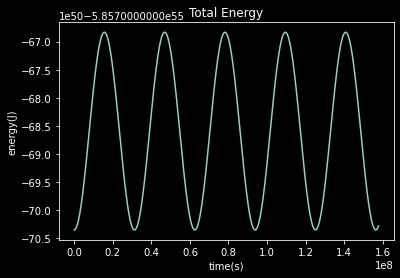

In [107]:
plt.xlabel("time(s)")
plt.ylabel("energy(J)")
plt.title("Total Energy")

plt.plot(T,TE)

## Problem 2

In [137]:
AU = 1.496e+11
CenterStar = Body(1.989e+30, [0,0])
EarthMass = Body(Earth.mass, [AU,0])
JupiterMass = Body(1.898e27, [(1-0.6)*4*AU, 0])

In [138]:
CenterStar.v = np.array([0,0])*np.array([0,1])
EarthMass.v = np.sqrt((G*CenterStar.mass)/AU)*np.array([0,1])
JupiterMass.v = np.sqrt((G*CenterStar.mass*(1+0.6))/(4*AU)*(1-0.6))*np.array([0,1])

In [139]:
t=0
endTime = 3.156e+9
dt = 10000.0
steps = int(np.ceil(endTime/dt))
Bodies = [CenterStar, EarthMass, JupiterMass]

for p1 in Bodies:
    for p2 in Bodies:
        p1.acc = np.add(p1.acc, p1.get_acc(p2))


CenterStar.v_half = ((CenterStar.acc*dt)/2)+CenterStar.v
EarthMass.v_half = ((EarthMass.acc*dt)/2)+EarthMass.v
JupiterMass.v_half = ((JupiterMass.acc*dt)/2)+JupiterMass.v

In [140]:
E_X = []
E_Y = []

C_X = []
C_Y = []

J_X = []
J_Y = []


KE = []
U = []

T = []

for i in range (steps):

    T.append(t)
    ke = 0
    u = 0
    for p1 in Bodies:
        if p1 == EarthMass:
            E_X.append(p1.pos[0])
            E_Y.append(p1.pos[1])
        elif p1 == CenterStar:
            C_X.append(p1.pos[0])
            C_Y.append(p1.pos[1])
        else:
            J_X.append(p1.pos[0])
            J_Y.append(p1.pos[1])

        ke+=p1.get_ke()

        p1.pos = p1.pos + dt * p1.v_half

        p1.acc = np.array([0,0])

        for p2 in Bodies:
            p1.acc = np.add( p1.acc, p1.get_acc(p2))
            u+=p1.get_u(p2)

        p1.v_half = p1.v_half + dt * p1.acc
    KE.append(ke)
    U.append(u)

    t += dt

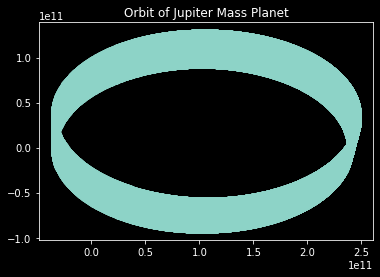

In [141]:
plt.title("Orbit of Jupiter Mass Planet")
plt.scatter(J_X,J_Y)


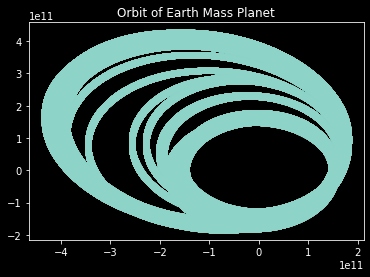

In [142]:
plt.title("Orbit of Earth Mass Planet")
plt.scatter(E_X,E_Y)

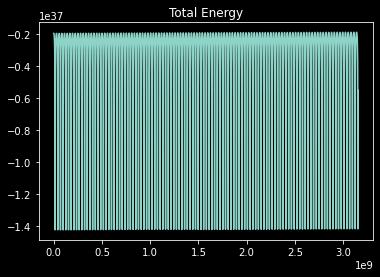

In [143]:
plt.title("Total Energy")
plt.plot(T, np.add(U, KE))


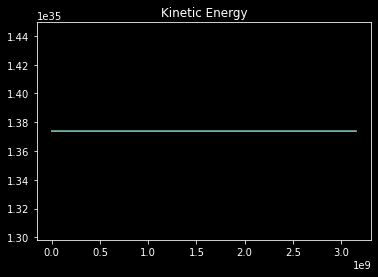

In [144]:
plt.title("Kinetic Energy")
plt.plot(T,KE)

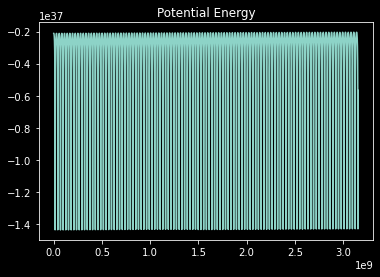

In [145]:
plt.title("Potential Energy")
plt.plot(T,U)

###### I don't think I got this part completely right, but here are my thoughts:
```
I noticed that because of the eccentricity
parameter, the Jupiter-massed planet has an
elliptical orbit. This caused the Earth-massed
planet to deviate from its regular cirrular
motion. Eventualy, this caused the potential
energy among planets to oscillate although the
kinetic energy stayed constant. The observed
oscillation in total energy reflects such point.


```